**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Check: region directory**

In [2]:
txt_fdiry = file.path(FD_RES, "region_coverage_fcc_score")

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

atac_ENCFF333TAT 
atac_ENCFF558BLC 
atac_ENCFF925CYR 
atac_ENCFF948AFM 
dnase_ENCFF185XRG 
dnase_ENCFF274YGF 
fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**Check: assay directory**

In [3]:
txt_region = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_region)
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

CRISPRi_FlowFISH_K562_Riley_JinWoo 
CRISPRi_Growth_K562_Gersbach_JinWoo 
MPRA_Lenti_K562_Nadav_Vikram 
MPRA_Tiling_K562_Tewhey_Hannah 
STARR_ATAC_K562_Reddy_KS274 
STARR_ATAC_K562_Reddy_KS91 
STARR_ATAC_K562_Reddy_KSMerge 
STARR_WHG_K562_Reddy_A001 
summary 


**Set global variable**

In [4]:
## init: region folder
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_FOLDER = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**Check input files**

In [5]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_folder, "summary")
txt_fname  = "region.coverage.score.*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/summary/region.coverage.score.atac.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/summary/region.coverage.score.fcc.final.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/summary/region.coverage.score.fcc.test.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/summary/region.coverage.score.fcc.total.tsv 


## Import data

In [6]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(
        FD_RES, "region_coverage_fcc_score", 
        txt_folder, 
        "summary"
    )
    txt_fname = "region.coverage.score.atac.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_atac_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 150041     12

$fcc_astarr_macs_input_union
[1] 246852     12



Chrom,ChromStart,ChromEnd,Region,Score,Score_Label,Score_Quantile,Zcore,Zcore_Label,Assay_Folder,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
chr1,10038,10405,chr1:10038-10405,3.940038,ASTARR Input TPM,Q3,-0.2608700,scale(log2(TPM + 1),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ATAC
chr1,14282,14614,chr1:14282-14614,2.841707,ASTARR Input TPM,Q2,-0.6570534,scale(log2(TPM + 1),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ATAC
chr1,16025,16338,chr1:16025-16338,3.830812,ASTARR Input TPM,Q3,-0.2960970,scale(log2(TPM + 1),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ATAC


**Check**

In [7]:
lst = lst_dat_region_score_atac_import
dat = lst[[1]]
table(dat$Score_Label)


ASTARR Input TPM 
          150041 

## Score Distribution

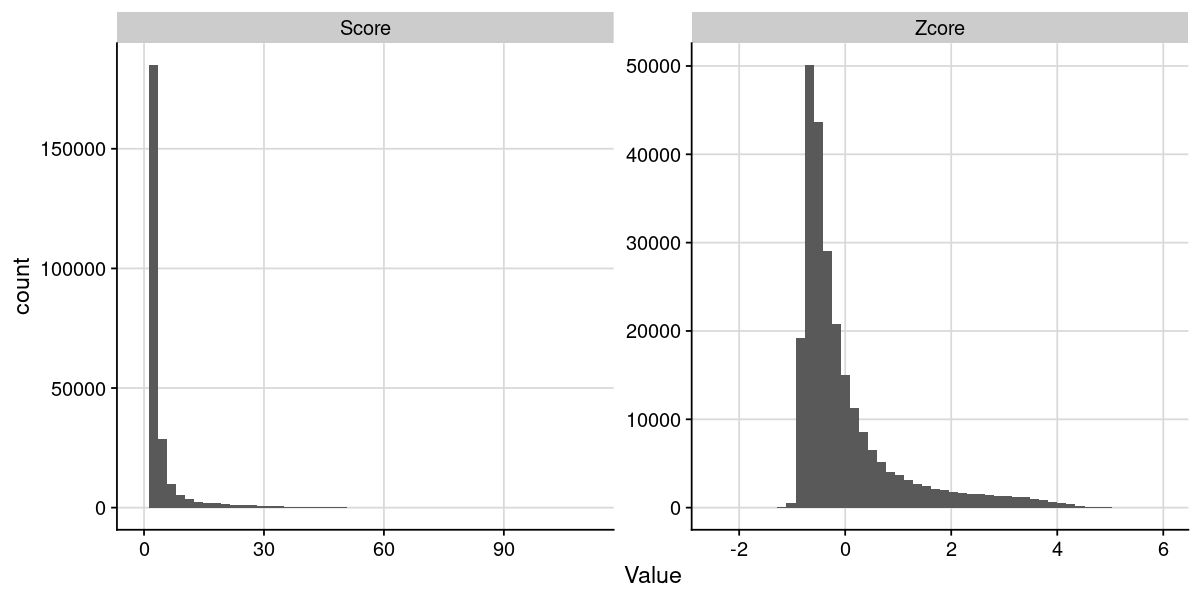

In [8]:
idx = "fcc_astarr_macs_input_union"
lst = lst_dat_region_score_atac_import
dat = lst[[idx]]

dat = dat %>% dplyr::select(Score, Zcore) %>% tidyr::gather(Metric, Value)
gpt = ggplot(dat, aes(x=Value)) +
    geom_histogram(bins = 50) +
    theme_cowplot() +
    background_grid() +
    facet_wrap(~Metric, scale = "free")

options(repr.plot.height=5, repr.plot.width=10)
print(gpt)

## Visualize the qunatile group

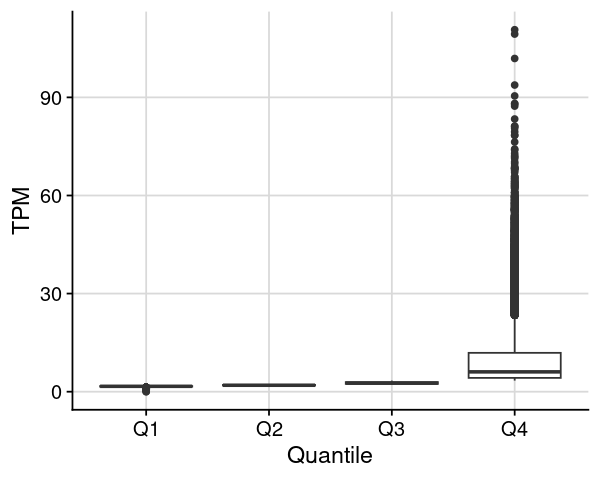

In [9]:
idx = "fcc_astarr_macs_input_union"
lst = lst_dat_region_score_atac_import
dat = lst[[idx]]

gpt = ggplot(dat, aes(x = Score_Quantile, y = Score)) +
    geom_boxplot() +
    theme_cowplot() +
    background_grid() +
    labs(x = "Quantile", y = "TPM")

options(repr.plot.height=4, repr.plot.width=5)
print(gpt)

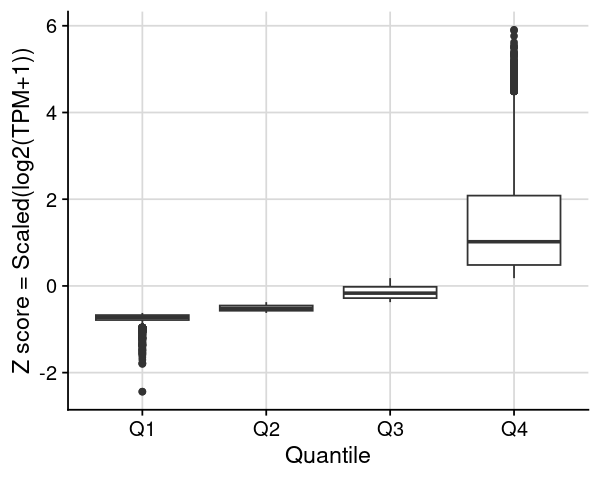

In [10]:
idx = "fcc_astarr_macs_input_union"
lst = lst_dat_region_score_atac_import
dat = lst[[idx]]

gpt = ggplot(dat, aes(x = Score_Quantile, y = Zcore)) +
    geom_boxplot() +
    theme_cowplot() +
    background_grid() +
    labs(x = "Quantile", y = "Z score = Scaled(log2(TPM+1))")

options(repr.plot.height=4, repr.plot.width=5)
print(gpt)